# Hotel Data Analysis Report
Your boss want a report to understand the relationship between average daily rate for hotels and the lead time before booking.
1. you need to compile a collecction of excel sheets into a single dataset and filter out cancellations
2. create a simple linear regression between these two variables


In [26]:
# bring in our libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress,pearsonr

In [2]:
# bring in our data
df1 = pd.read_excel("C:/Users/LTECH/Desktop/Enterprise DNA/Python 1/hotel_revenue_historical_full.xlsx", sheet_name="2018")
df2 = pd.read_excel("C:/Users/LTECH/Desktop/Enterprise DNA/Python 1/hotel_revenue_historical_full.xlsx", sheet_name="2019")
df3 = pd.read_excel("C:/Users/LTECH/Desktop/Enterprise DNA/Python 1/hotel_revenue_historical_full.xlsx", sheet_name="2020")
full_dataset = pd.concat([df1,df2,df3])
full_dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40682,City Hotel,1,1,2020,February,5,1,0,0,1,...,No Deposit,NaN,153.0,0,Transient,0.0,0,1,No-Show,2020-02-01
40683,City Hotel,1,31,2020,July,29,16,2,0,1,...,No Deposit,NaN,NaN,0,Transient,135.0,0,2,No-Show,2020-07-16
40684,City Hotel,1,25,2020,May,18,6,2,1,1,...,No Deposit,NaN,450.0,0,Transient,125.0,0,0,No-Show,2020-05-06
40685,City Hotel,1,6,2020,July,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2020-07-17


In [3]:
full_dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2018-05-29


In [4]:
full_dataset["is_canceled"].value_counts(normalize=True)

0    0.627755
1    0.372245
Name: is_canceled, dtype: float64

In [5]:
filtered_data = full_dataset[full_dataset["is_canceled"]!=1]
filtered_data.to_csv("filtered_data_Hotel_Dataset.csv")

C:\Users\LTECH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='adr', ylabel='Density'>

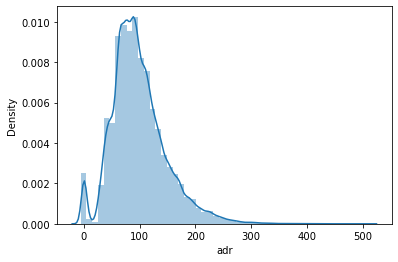

In [6]:
# univariate and bivariate analysis
sns.distplot(filtered_data["adr"])

C:\Users\LTECH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LTECH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


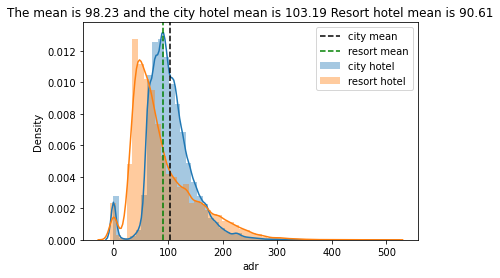

In [7]:
sns.distplot(filtered_data[filtered_data["hotel"]=="City Hotel"]["adr"],label="city hotel")
sns.distplot(filtered_data[filtered_data["hotel"]=="Resort Hotel"]["adr"],label="resort hotel")
city_mean =filtered_data[filtered_data["hotel"]=="City Hotel"]["adr"].mean()
resort_mean = filtered_data[filtered_data["hotel"]=="Resort Hotel"]["adr"].mean()
plt.axvline(city_mean, color="black",linestyle="--",label="city mean")
plt.axvline(resort_mean, color="green",linestyle="--",label="resort mean")
plt.title(f'The mean is {filtered_data["adr"].mean():.2f} and the city hotel mean is {city_mean:.2f} Resort hotel mean is {resort_mean:.2f}');
plt.legend()
plt.savefig("ADR distribution")

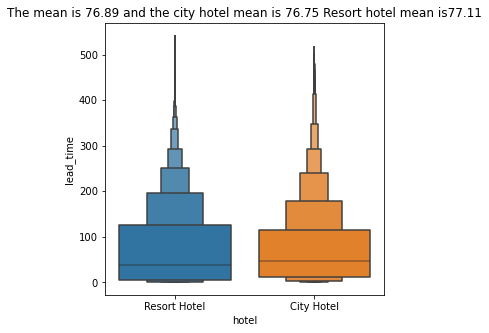

In [8]:
plt.figure(figsize=(5,5))
sns.boxenplot(data=filtered_data,y='lead_time', x='hotel',showfliers=False)
city_mean =filtered_data[filtered_data["hotel"]=="City Hotel"]["lead_time"].mean()
resort_mean = filtered_data[filtered_data["hotel"]=="Resort Hotel"]["lead_time"].mean()
plt.title(f'The mean is {filtered_data["lead_time"].mean():.2f} and the city hotel mean is {city_mean:.2f} Resort hotel mean is{resort_mean:.2f}');

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

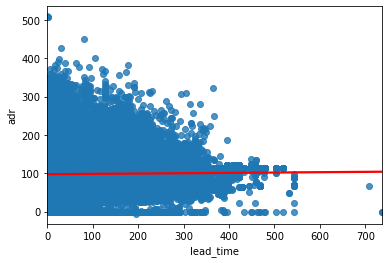

In [9]:
# bivariate analysis and linear regression
sns.regplot(data=filtered_data, y="adr", x="lead_time",line_kws={'color':"red"})

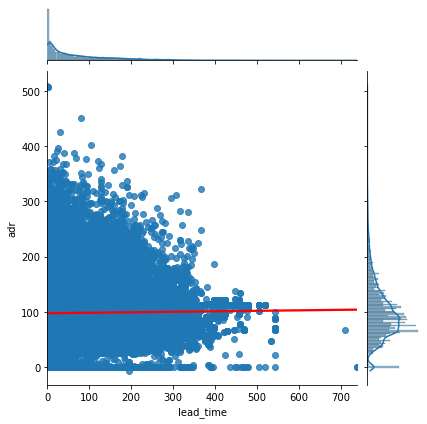

In [10]:
sns.jointplot(data=filtered_data, y="adr", x="lead_time",kind="reg",joint_kws={'line_kws':{'color':"red"}})

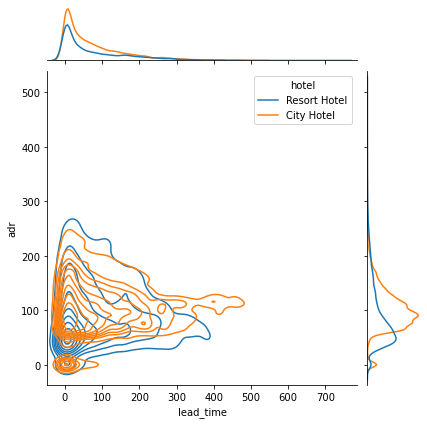

In [11]:
sns.jointplot(data=filtered_data, y="adr", x="lead_time",kind="kde",hue="hotel")

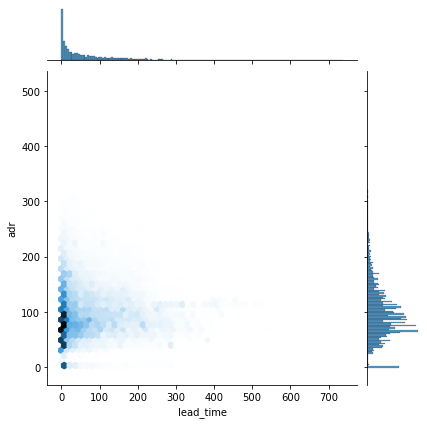

In [12]:
sns.jointplot(data=filtered_data, y="adr", x="lead_time",kind="hex")

In [13]:
# linear regression
linregress(filtered_data['lead_time'],filtered_data['adr'])

LinregressResult(slope=0.008855843930593445, intercept=97.54811713144225, rvalue=0.016122313985460032, pvalue=1.487473427135869e-06, stderr=0.0018398933719799568, intercept_stderr=0.2159700064503312)

In [25]:
correlation = pearsonr(filtered_data["adr"],filtered_data["lead_time"])[0]
correlation

0.016122313985460046

In [31]:
# Linear Regression
correlation = pearsonr(filtered_data["adr"],filtered_data["lead_time"])[0]
slope = linregress(filtered_data['lead_time'],filtered_data['adr'])[0]
intercept = linregress(filtered_data['lead_time'],filtered_data['adr'])[1]
correlation_table = pd.DataFrame({"Name":["correlation","slope","intercept"],"Coefficients":[correlation,slope,intercept]})
correlation_table.to_csv("correlation_table.csv")

In [15]:
pwd

'C:\\Users\\LTECH'